<a href="https://colab.research.google.com/github/iMrugesh9/EDA_Playstore_Data/blob/main/Play_Store_App_Review_Analysis(Mrugesh_Patel).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b>One App installer Platform  wants to know  which apps to show & arrange on homepage and which apps to recommend to customers via various social media apps and pop-up ads based on the data provided.In addition to that they need to setup a homepage on their app which recommeds apps which attracts more users.</b>




 <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

<b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>
<b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>








### To start working with data, and answer the questions, we need think like a user. 
###As a user, we can think of what drives a particular user to download a app in to their mobile. The First think a user considers is how highly an app is rated, and then in order to check more credibility, we check the number of installs made. The size, version, Last updated are secondary options which a user considers.
### So we can say the Number of Installs and Rating are two most important variables to mode forward.###



### Another way of looking is from a App developer percepctive. 
###To make a homepage of an app, We need to find best categories, corresponding genres; which will be displayed as a Top Categories.
###And depending upon user demographic, we can choose to shuffle/change apps from the top categories in that demographic.
###Finally we can have a search page, where we would, by default, list the Top apps from the top categories and considering the sentiment of the reviews posted by users.###


##Based on above discusion we can ask following question/requirenment that should be answered from EDA on dataset.
***1.   Rank and sort App Categories based on their Installs and ratings***

***2.   Determine the best genres and corresponding Apps for each categories based on Installs ans Ratings.***

***3.   Which is the most distinct content rating type ?***

***4.   What are the most downloaded categories by most distinct content rating type?***

***5. Which are 10 best and worst apps according to user Reviews?***


##<B>Data Exploration 

In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Importing the datasets
path1='/content/drive/MyDrive/EDA/Play_Store_Data.csv'
df=pd.read_csv(path1)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
path2='/content/drive/MyDrive/EDA/User_Reviews.csv'
df_reviews=pd.read_csv(path2)
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### **There are several columns with different datatypes, the description of which is below.**


*   **App** - The Name of the app
*   **Category** - Category the app belons to

*   **Rating** - average rating provide provided by users for that app

*   **Reviews** - Number of Reviews provided by users for that app

*   **Size** - Size of the App 

*   **Installs** - Total Number of Installation of the app
*   **Type** - App is Paid or Free

*   **Price** - Price of the app
*   **Content Rating** - The age-group which is taregeted/applead to
*   **Genres** - App belongs to which genere 

*   **Last updated** - The date on which the app was last updated


*   **Current ver** - The current version of the app


*   **Android ver** - The android version which can support the app

*   **Translated Review** - The review posted by user
*   **Sentiment** - The overall sentiment category(*positive/negative/nuetral*)the review belongs

*   **Sentiment_polarity** -Sentiment Score,a float value which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

*   **Sentiment_Subjectivity** - float which lies in the range of [0,1],refer to personal opinion, emotion or judgment 







In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [8]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
df_reviews.App.unique().shape

(1074,)

In [11]:
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [12]:
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [13]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [14]:
df.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [15]:
df_reviews['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [16]:
df_reviews['Sentiment_Subjectivity'].value_counts()

0.000000    4416
1.000000    1749
0.500000    1647
0.600000    1166
0.750000    1140
            ... 
0.616909       1
0.234848       1
0.154762       1
0.591146       1
0.259470       1
Name: Sentiment_Subjectivity, Length: 4474, dtype: int64

##<b>Data Scrubbing<b>
Converting existing data to workable data

In [17]:
#droppping wrong category rows
df=df[~df['Category'].isin(['1.9'])]
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<b> Removing Duplicates

In [18]:
df.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

There are 9659 unique apps and several apps has multiple entries

In [19]:
df[df.App.duplicated()].shape


(1181, 13)

Removing the extra entries and keeping the first entry for every app with extra entry/entries.

In [20]:
df.drop_duplicates(subset='App',keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


<b>removing NaN and Outliers 

In [21]:
df.Rating.fillna(value=df['Rating'].median(),inplace=True)
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Filling the nan values in Rating column with its median values, and removing the outliers

In [22]:
df['Rating'][df['Rating']>5]=df['Rating'].median()
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [23]:
df.Installs.unique()
df.Installs.value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

*removing Rows containing outliers and typos*  

In [24]:
Strngs=['Free','0','0+','1+','5+']
df_installs=df[~df['Installs'].isin(Strngs)]
df_installs.head()
df_installs.Installs.value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
500,000,000+        24
1,000,000,000+      20
Name: Installs, dtype: int64

Next step is to convert the install values to numerical form by removing <i>'+'<i> at the end.

In [25]:
df_installs['Installs']=df_installs['Installs'].map(lambda x: x.rstrip('+'))
df_installs['Installs']=df_installs['Installs'].str.replace(',','')
df_installs['Installs']=df_installs['Installs'].astype(int)
df_installs.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##<b> DATA visualization

### Considering No of Installs, determining Top categories.

In [26]:
Categories=df_installs.groupby('Category')
type(Categories['Installs'].sum().to_frame())
Category_installs=Categories['Installs'].sum()


Aggregate Sum value for each category is counted, and plotted.

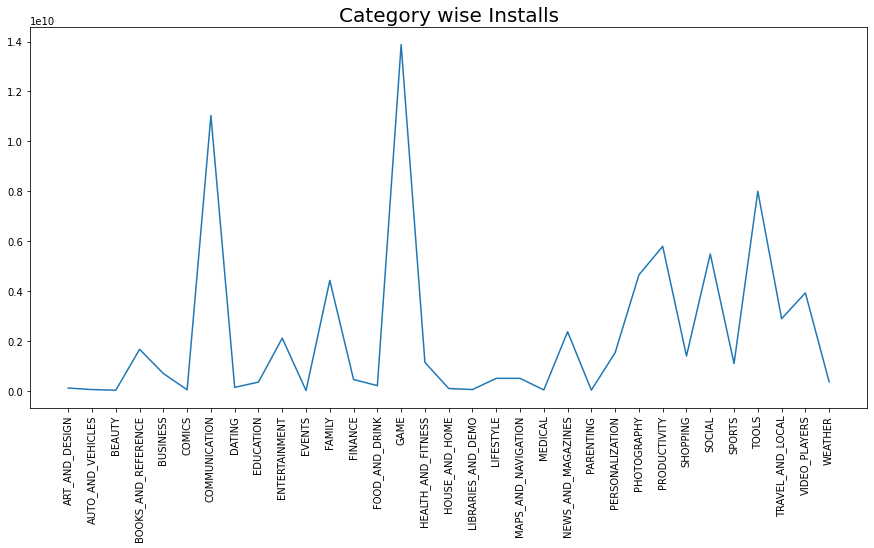

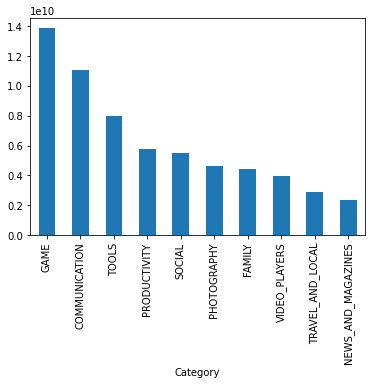

In [27]:
fig,ax=plt.subplots(figsize=(15,7))
plt.plot(Category_installs.index,Category_installs)
plt.xticks(rotation=90);plt.title('Category wise Installs',fontsize=20)
plt.show()
fig,ax=plt.subplots()
Sorted_Category_installs=Category_installs.sort_values(ascending=False)
Sorted_Category_installs[:10].plot(x ='Categories', y='Total_Installs', kind ='bar')	




*   The Top  Categories according to number of installs are,


1.   Game 
2.   Communication
3.   Tools
4.   Productivity
5.   Social
6.   Photography









### Next Considering Mean Rating for every Category for picking the top 5 

In [28]:
Categories['Rating'].mean()

Category
ART_AND_DESIGN         4.355556
AUTO_AND_VEHICLES      4.202439
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.332243
BUSINESS               4.162626
COMICS                 4.185714
COMMUNICATION          4.153526
DATING                 4.036905
EDUCATION              4.363866
ENTERTAINMENT          4.135294
EVENTS                 4.396825
FAMILY                 4.193212
FINANCE                4.135693
FOOD_AND_DRINK         4.189908
GAME                   4.247374
HEALTH_AND_FITNESS     4.251056
HOUSE_AND_HOME         4.172603
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.128650
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.190501
NEWS_AND_MAGAZINES     4.154980
PARENTING              4.300000
PERSONALIZATION        4.326301
PHOTOGRAPHY            4.166071
PRODUCTIVITY           4.204098
SHOPPING               4.237313
SOCIAL                 4.251073
SPORTS                 4.239297
TOOLS                  4.070833
TRAVEL_AND_LOCAL       4.098598

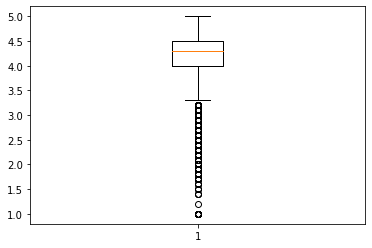

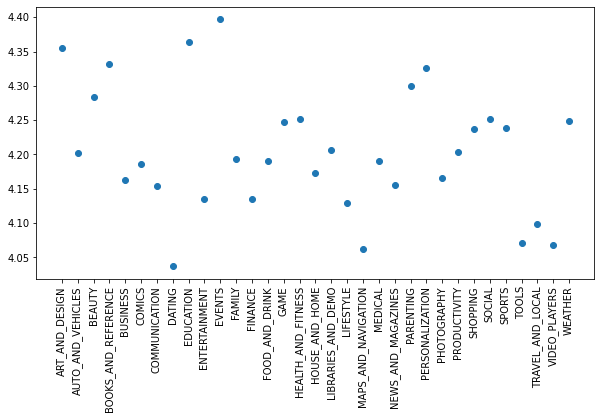

In [29]:
plt.boxplot(df['Rating'])

fig,ax=plt.subplots(figsize=(10,5))
plt.scatter(Categories['Rating'].mean().index,Categories['Rating'].mean())
plt.xticks(rotation=90)
plt.show()


In [30]:
ylabels=[]
for cat in Sorted_Category_installs.index[:10]:
  ylabels.append(cat)
ylabels


['GAME',
 'COMMUNICATION',
 'TOOLS',
 'PRODUCTIVITY',
 'SOCIAL',
 'PHOTOGRAPHY',
 'FAMILY',
 'VIDEO_PLAYERS',
 'TRAVEL_AND_LOCAL',
 'NEWS_AND_MAGAZINES']

Considering Mean Values of ratings for each category,the Top Categories are, 

1.   'GAME'
2.   'COMMUNICATION'
3.   'TOOLS',
4.   'PRODUCTIVITY',
5.   'SOCIAL',
6.   'PHOTOGRAPHY',
7.   'FAMILY',
8.   'VIDEO_PLAYERS',
9.   'TRAVEL_AND_LOCAL',
10.  'NEWS_AND_MAGAZINES


### Counting %-wise rating for each category 
Apart from Mean ratings, Most Rating value of between 4 and 5 can be a metric to identify best rated category.

In [31]:
Category_Rating_dict=dict()
for col in ylabels:
  temp1=[]
  for row in np.arange(4):
    temp1.append(df[(df['Category']==col) & (df['Rating']<=(row+2)) & (df['Rating']>(row+1))].shape[0])
    temp2=np.array(temp1)
  Category_Rating_dict[col]=temp2*100/sum(temp2)
category_names=['1<rating<=2','2<rating<=3','3<rating<=4','4<rating<=5']
Category_Rating_dict



{'COMMUNICATION': array([ 0.        ,  2.22929936, 23.88535032, 73.88535032]),
 'FAMILY': array([ 0.49207217,  2.84308365, 23.72881356, 72.93603062]),
 'GAME': array([ 0.10438413,  0.73068894, 20.35490605, 78.81002088]),
 'NEWS_AND_MAGAZINES': array([ 0.39370079,  4.33070866, 24.01574803, 71.25984252]),
 'PHOTOGRAPHY': array([ 0.35587189,  4.62633452, 22.06405694, 72.95373665]),
 'PRODUCTIVITY': array([ 0.53619303,  2.68096515, 17.69436997, 79.08847185]),
 'SOCIAL': array([ 0.41841004,  1.25523013, 17.9916318 , 80.33472803]),
 'TOOLS': array([ 0.97087379,  5.2184466 , 26.09223301, 67.7184466 ]),
 'TRAVEL_AND_LOCAL': array([ 0.        ,  4.56621005, 25.57077626, 69.8630137 ]),
 'VIDEO_PLAYERS': array([ 1.22699387,  3.06748466, 31.28834356, 64.41717791])}

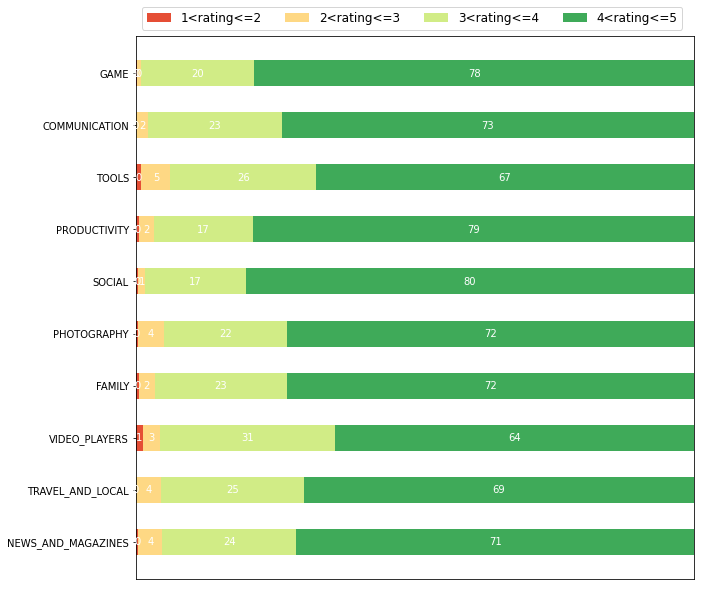

In [32]:
def discrete_dist(results, category_names,fig_size,legend_size):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=fig_size)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=legend_size)

    return fig, ax


discrete_dist(Category_Rating_dict, category_names,(10, 10),'large')
plt.show()

###<I>From Above bar plot it is evident that,
###<i>Game,Communication,Social,Productivity,family and Photography categories has the highest numbers of positive Ratings(5).<I>


Considering Number of Installs for Every Category with that the Top 5 Categories are: 
<b>
1.   Game
2.   Commnication
3.   Social
4.   Productivity
5.   Photography


In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
Best_Categories=['GMAE','COMMUNICATION','SOCIAL','PRODUCTIVITY','PHOTOGRAPHY']
for cat in df_installs['Category'].unique():
  print(cat)
  print(df_installs[df_installs['Category']==cat].Genres.unique())

ART_AND_DESIGN
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure']
AUTO_AND_VEHICLES
['Auto & Vehicles']
BEAUTY
['Beauty']
BOOKS_AND_REFERENCE
['Books & Reference']
BUSINESS
['Business']
COMICS
['Comics' 'Comics;Creativity']
COMMUNICATION
['Communication']
DATING
['Dating']
EDUCATION
['Education;Education' 'Education' 'Education;Creativity'
 'Education;Music & Video' 'Education;Action & Adventure'
 'Education;Pretend Play' 'Education;Brain Games']
ENTERTAINMENT
['Entertainment' 'Entertainment;Music & Video' 'Entertainment;Brain Games'
 'Entertainment;Creativity']
EVENTS
['Events']
FINANCE
['Finance']
FOOD_AND_DRINK
['Food & Drink']
HEALTH_AND_FITNESS
['Health & Fitness']
HOUSE_AND_HOME
['House & Home']
LIBRARIES_AND_DEMO
['Libraries & Demo']
LIFESTYLE
['Lifestyle' 'Lifestyle;Pretend Play']
GAME
['Adventure;Action & Adventure' 'Arcade' 'Casual' 'Card'
 'Casual;Pretend Play' 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music'
 'Word' 'Racin

###We have several Generes For Game and Family Categories, and both of these categories are in Top 10 best Categories considering Rating and installs.
###So we can further extend the above work for determining best genres for both of these categories 

In [37]:
Game_df=df_installs[df_installs['Category']=='GAME']
Family_df=df_installs[df_installs['Category']=='FAMILY']


In [38]:
Game_genres=Game_df.groupby('Genres')
Game_genres_installs=Game_genres['Installs'].sum()
Game_genres_installs

Genres
Action                           3483039190
Action;Action & Adventure          25000000
Adventure                         296695320
Adventure;Action & Adventure      100000000
Arcade                           3755129140
Board                             112027210
Card                              152826100
Casino                            130260700
Casual                           2139000000
Casual;Action & Adventure         100000000
Casual;Brain Games                 10000000
Casual;Creativity                  10000000
Casual;Pretend Play                50000000
Music                             170120500
Puzzle                            603200000
Racing                           1400247320
Role Playing                      109100000
Simulation                        151100000
Simulation;Action & Adventure      10000000
Simulation;Education                 100000
Sports                            316000000
Strategy                          457300000
Trivia                   

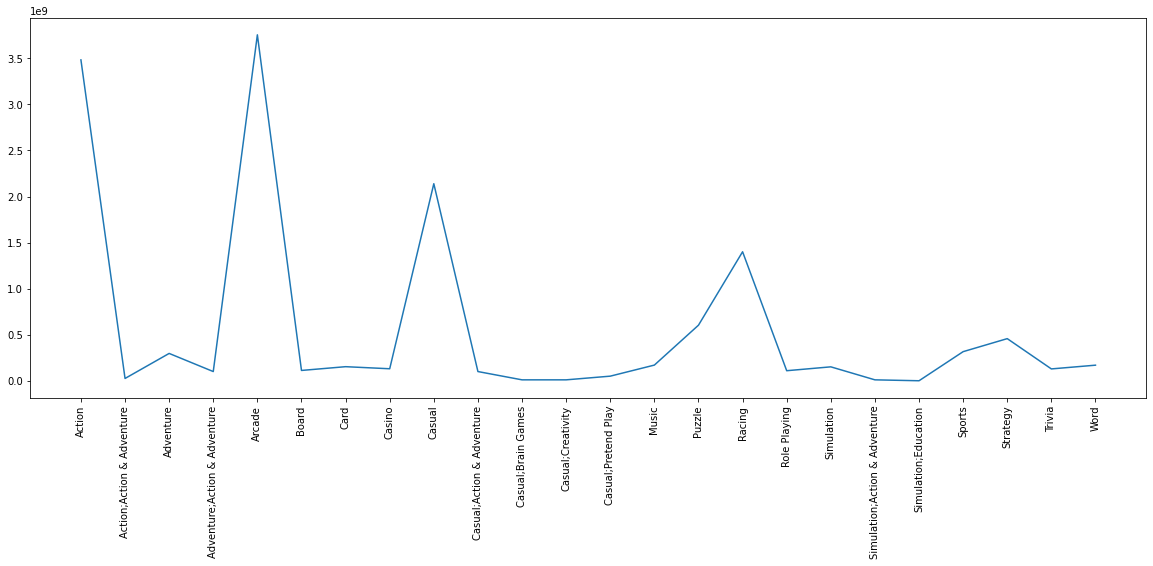

In [39]:
fig,ax=plt.subplots(figsize=(20,7))
plt.plot(Game_genres_installs.index,Game_genres_installs)
plt.xticks(rotation=90);plt.show()


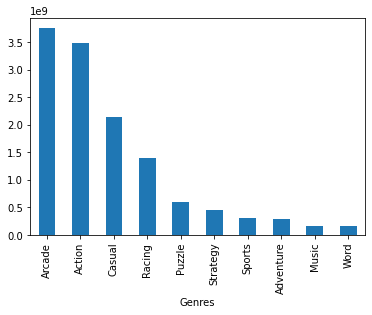

In [40]:
fig,ax=plt.subplots()
Sorted_Game_genres_installs=Game_genres_installs.sort_values(ascending=False)
Sorted_Game_genres_installs[:10].plot(x ='Genres', y='Total_Installs', kind ='bar')	


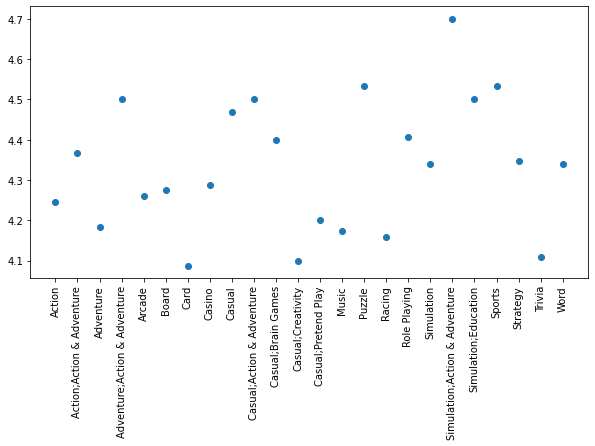

In [41]:
fig,ax=plt.subplots(figsize=(10,5))
plt.scatter(Game_genres['Rating'].mean().index,Game_genres['Rating'].mean())
plt.xticks(rotation=90)
plt.show()

In [42]:
Game_Genre_ylabels=[]
for cat in Sorted_Game_genres_installs.index[:10]:
  Game_Genre_ylabels.append(cat)
Game_Genre_ylabels


['Arcade',
 'Action',
 'Casual',
 'Racing',
 'Puzzle',
 'Strategy',
 'Sports',
 'Adventure',
 'Music',
 'Word']

###Top Genres in GAME Category according to Number of Installs are,

1.   'Arcade',
2.   'Action',
3.   'Casual',
4.   'Racing',
5.   'Puzzle',
 
Number of Installs for Top 5 Categories are much higher than that of rest of the categories.

Next we consider the similar approch with ratings, to determine top genres.

In [43]:
Game_Genre_Rating_dict=dict()
Game_Genre_Count_dict=dict()
temp1=[];temp2=[]
for col in Game_Genre_ylabels:
  temp1=[]
  for row in np.arange(4):
    temp1.append(Game_df[(Game_df['Genres']==col) & (Game_df['Rating']<=(row+2)) & (Game_df['Rating']>(row+1))].shape[0])
    temp2=np.array(temp1)
  Game_Genre_Rating_dict[col]=temp2*100/sum(temp2)
  Game_Genre_Count_dict[col]=sum(temp2)
Game_Genre_Count_dict



{'Action': 299,
 'Adventure': 73,
 'Arcade': 177,
 'Casual': 23,
 'Music': 19,
 'Puzzle': 24,
 'Racing': 91,
 'Sports': 6,
 'Strategy': 17,
 'Word': 23}

In [44]:
Sorted_Game_Genre_Rating_dict=dict()
temp=(sorted(Game_Genre_Count_dict.items(), key =lambda kv: [kv[1], kv[0]]))
for i in np.arange(5):
  Sorted_Game_Genre_Rating_dict[temp[-i][0]]=Game_Genre_Rating_dict[temp[-i][0]]
Sorted_Game_Genre_Rating_dict


{'Action': array([ 0.        ,  0.        , 20.73578595, 79.26421405]),
 'Adventure': array([ 0.        ,  0.        , 28.76712329, 71.23287671]),
 'Arcade': array([ 0.       ,  0.       , 20.9039548, 79.0960452]),
 'Racing': array([ 0.        ,  0.        , 35.16483516, 64.83516484]),
 'Sports': array([  0.,   0.,   0., 100.])}

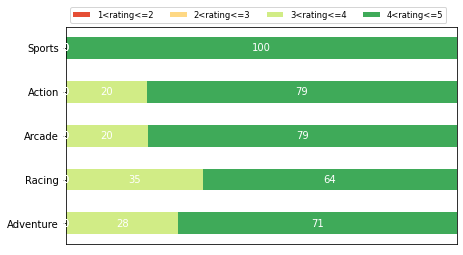

In [45]:
discrete_dist(Sorted_Game_Genre_Rating_dict, category_names,(7,4),'small')
plt.show()

As we can See Sports, Action and Arcade genres are most highly rated among the Top 5 Genres.
## So, Top Genres According to Installs and Ratings Combined are,


1.   Sports 
2.   Action
3.   Arcade



In [46]:
Family_genres=Family_df.groupby('Genres')
Family_genres_installs=Family_genres['Installs'].sum()
Family_genres_installs
 


Genres
Action;Action & Adventure                28020500
Adventure;Action & Adventure              6150000
Adventure;Brain Games                      100000
Adventure;Education                      10000000
Arcade;Action & Adventure                45210000
                                           ...   
Strategy;Creativity                       1000000
Strategy;Education                         500000
Trivia;Education                              100
Video Players & Editors;Creativity        5000000
Video Players & Editors;Music & Video     5000000
Name: Installs, Length: 70, dtype: int64

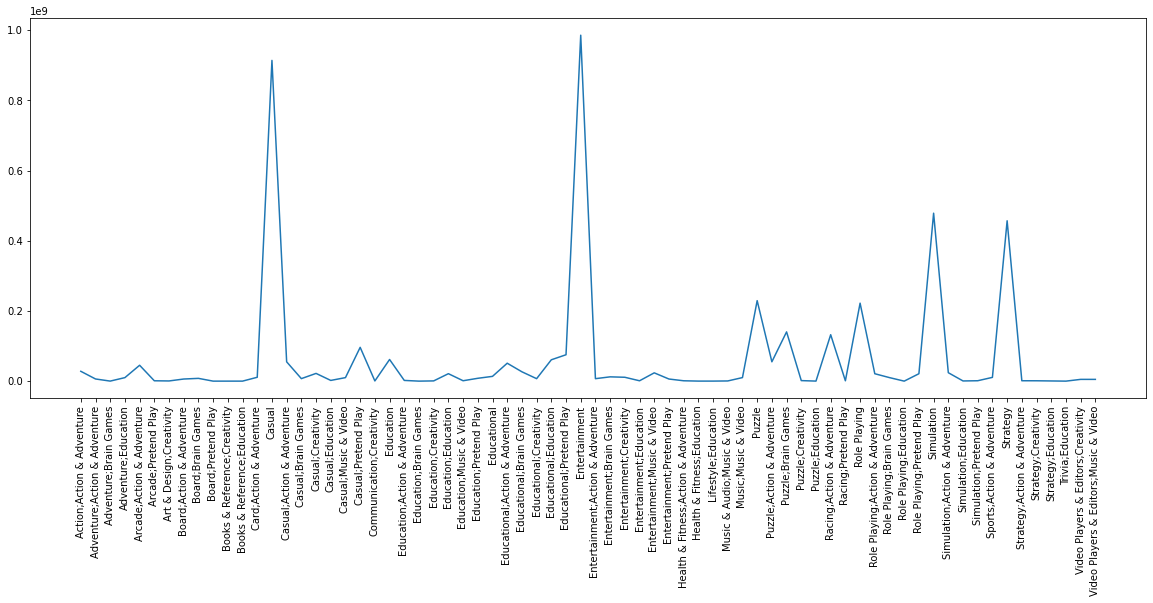

In [47]:
fig,ax=plt.subplots(figsize=(20,7))
plt.plot(Family_genres_installs.index,Family_genres_installs)
plt.xticks(rotation=90);plt.show()
 


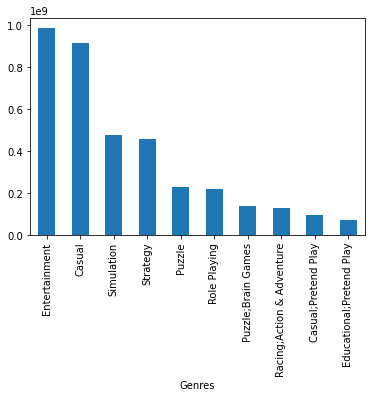

In [48]:
fig,ax=plt.subplots()
Sorted_Family_genres_installs=Family_genres_installs.sort_values(ascending=False)[0:10]
Sorted_Family_genres_installs[:10].plot(x ='Genres', y='Total_Installs', kind ='bar') 
 


### Top 6 Genres according to Number of Install in Family Categories are,


1.   Entertainment
2.   Casual
3.   Simulation
4.   Strategy
5.   Puzzle
6.   Role Playing


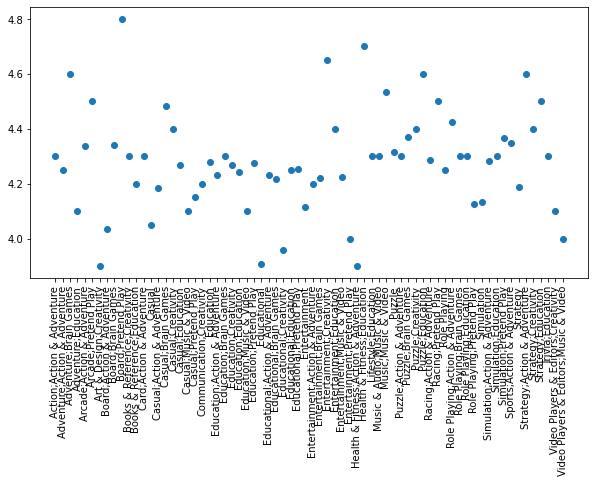

In [49]:
fig,ax=plt.subplots(figsize=(10,5))
plt.scatter(Family_genres['Rating'].mean().index,Family_genres['Rating'].mean())
plt.xticks(rotation=90)
plt.show()
 
 


In [50]:
Family_Genre_ylabels=[]
for cat in Sorted_Family_genres_installs.index[:10]:
  Family_Genre_ylabels.append(cat)
 
Family_Genre_Rating_dict=dict()
Family_Genre_Count_dict=dict()
temp1=[];temp2=[]
for col in Family_Genre_ylabels:
  temp1=[]
  for row in np.arange(4):
    temp1.append(Family_df[(Family_df['Genres']==col) & (Family_df['Rating']<=(row+2)) & (Family_df['Rating']>(row+1))].shape[0])
    temp2=np.array(temp1)
  Family_Genre_Rating_dict[col]=temp2*100/sum(temp2)
  Family_Genre_Count_dict[col]=sum(temp2)



In [51]:
Family_Genre_ylabels

['Entertainment',
 'Casual',
 'Simulation',
 'Strategy',
 'Puzzle',
 'Role Playing',
 'Puzzle;Brain Games',
 'Racing;Action & Adventure',
 'Casual;Pretend Play',
 'Educational;Pretend Play']

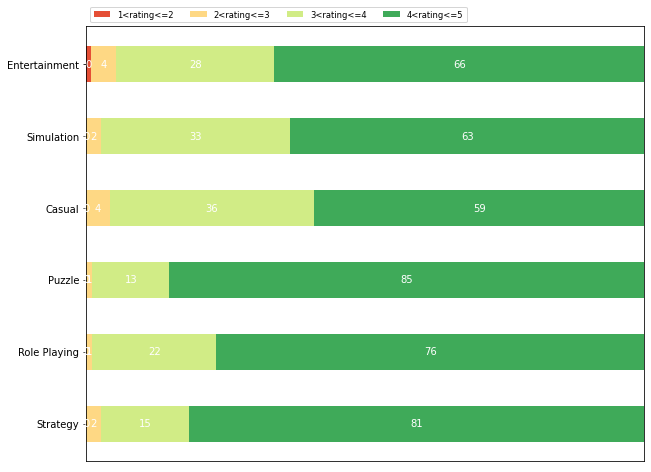

In [52]:
Sorted_Family_Genre_Rating_dict=dict()
temp=(sorted(Family_Genre_Count_dict.items(), key =lambda kv: [kv[1], kv[0]]))
for i in np.arange(1,7):
  Sorted_Family_Genre_Rating_dict[temp[-i][0]]=Family_Genre_Rating_dict[temp[-i][0]]
Sorted_Family_Genre_Rating_dict
 
 
discrete_dist(Sorted_Family_Genre_Rating_dict, category_names,(10,8),'small')
plt.show()


So Top Genres according to Ratings are,

Puzzle,Strategy,Role Playing,Entertainment,Simulation




So, Top Genres for combined installs and Ratings are,


1.   Entertainment
2.   Strategy
3.   Puzzle

